# Makes a figure of the mask and CS2/Envisat pole holes

In [1]:
import mask
# from mpl_toolkits.basemap import Basemap
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as ccrs
import math
import cartopy
print(cartopy.__version__)
import matplotlib
print(matplotlib.__version__)
from mask import select_region

region_codes = {"Lakes":0,
        "Oceans":1,
        "Okhotsk":2,
        "Bering":3,
        "Hudson":4,
        "St Lawrence":5,
        "Baffin":6,
        "Greenland":7,
        "Barents":8,
        "Kara":9,
        "Laptev":10,
        "East Siberian":11,
        "Chukchi":12,
        "Beaufort":13,
        "Canadian Archipelago":14,
        "Central Arctic":15,
        "Land":20,
        "Coast":21}

# Envisat orbital inclination = 98.55 degrees
# Mask out anything North of 81.45 degrees

0.18.0
3.2.2


/home/robbie/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
# Import mask data from netcdf

mask_dir = '/home/robbie/Dropbox/Code/mask.nc'
mask_data = Dataset(mask_dir)

lon, lat =np.array(mask_data['lon']), np.array(mask_data['lat'])
my_mask = np.array(mask_data['mask_values'])

###################################################################

# Define what the colours should be and where the annotations should go

Regions = {"Kara":('Oranges',(0.7,0.45)),
            "Laptev":('Blues',(0.65,0.63)),
            "East Siberian":('Greens',(0.5,0.78)),
            "Chukchi":('Reds',(0.365,0.81)),
            "Beaufort":('pink',(0.25,0.72)),
            "Central Arctic":('Purples',(0.4,0.58)),
            "Barents":('Set2',(0.63,0.25))}

###################################################################

# Make the plot

fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='npstere',boundinglat=65,lon_0=360,resolution='l')
    
for region in Regions.keys():
    
    region_mask = np.ones((361,361))
    region_mask = ma.masked_where(my_mask != region_codes[region], region_mask)
    region_mask = np.ma.filled(region_mask.astype(float), np.nan)

    m.contourf(lon, lat, region_mask, latlon=True,cmap=Regions[region][0], vmax=1)
    
    plt.annotate(region,xy=Regions[region][1],xycoords="axes fraction",fontsize='large')

###################################################################

# Draw satellite latitude limit lines

new_layer = np.zeros((361,361))
new_layer = ma.masked_where((lat < 88) & (lat > 81.45), new_layer)
new_layer = np.ma.filled(new_layer.astype(float), 1)
m.contour(lon, lat, new_layer, levels=[0,1],latlon=True,colors='k',linestyles='-',linewidths=0.7)

####################################################################

m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='k',alpha=0.2)

# my_mask = select_region('basin',my_mask)
# m.contour(lon, lat, my_mask, levels=list(range(1,16)),latlon=True,colors='k',linestyles='-',linewidths=1)

plt.savefig("/home/robbie/Dropbox/Apps/Overleaf/SnowModel-LG_Paper/Figures/mask_figure.png",dpi=600, bbox_inches='tight')
plt.show()

/home/robbie/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


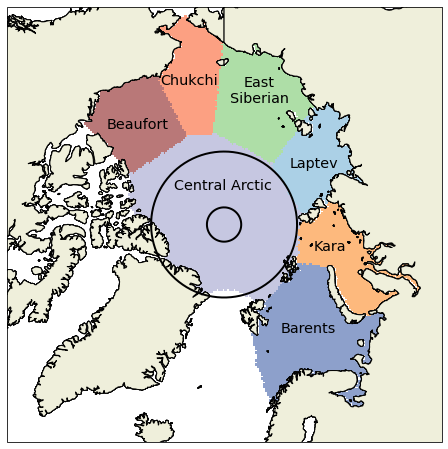

In [33]:
# Import mask data from netcdf

mask_dir = '/home/robbie/Dropbox/Code/mask.nc'
mask_data = Dataset(mask_dir)

lon, lat =np.array(mask_data['lon']), np.array(mask_data['lat'])
my_mask = np.array(mask_data['mask_values'])

###################################################################

# Define what the colours should be and where the annotations should go


Regions = {"Kara":('Oranges',(0.705,0.44)),
            "Laptev":('Blues',(0.65,0.63)),
            "East Siberian":('Greens',(0.58,0.78)),
            "Chukchi":('Reds',(0.353,0.82)),
            "Beaufort":('pink',(0.23,0.72)),
            "Central Arctic":('Purples',(0.385,0.58)),
            "Barents":('Set2',(0.63,0.25))}

###################################################################

# Make the plot

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
    
for region in Regions.keys():
    
    region_mask = np.ones((361,361))
    region_mask = ma.masked_where(my_mask != region_codes[region], region_mask)
    region_mask = np.ma.filled(region_mask.astype(float), np.nan)

    ax.pcolormesh(lon, lat, region_mask, cmap=Regions[region][0], vmin=0, vmax = 3, transform=ccrs.PlateCarree())
    
    if region == 'East Siberian': #Handles the line break required for ES sea
        ax.annotate('East\nSiberian',xy=Regions[region][1],xycoords="axes fraction",fontsize='x-large',ha='center')        
    else:
        ax.annotate(region,xy=Regions[region][1],xycoords="axes fraction",fontsize='x-large')
                             
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    
# Annotate the Envisat and CS2 orbital limits

ax.gridlines(ylocs=[88,81.5],xlocs=[],color='k',linewidth=2)

plt.savefig("/home/robbie/Dropbox/Apps/Overleaf/SnowModel-LG_Paper/Figures/mask_figure2.png",dpi=600, bbox_inches='tight')

plt.show()